In [ ]:
from sympy import *
t = Symbol('t')
x = Function('x')
y = Function('y')
z = Function('z')

In [ ]:
ode1 = Eq(diff(x(t), t), -0.1 * x(t))
ode2 = Eq(diff(y(t), t), -0.2 * y(t))
ode3 = Eq(diff(z(t), t), 0.1*x(t) + 0.2*y(t) - 0.1*z(t))
dsol1= dsolve([ode1, ode2, ode3], ics={x(0): 1, y(0): 2, z(0): 0})
display(dsol1[0])
display(dsol1[1])
display(dsol1[2])

Eq(x(t), 1.0*exp(-0.1*t))

Eq(y(t), 2.0*exp(-0.2*t))

Eq(z(t), 0.1*t*exp(-0.1*t) - 4.0*exp(-0.2*t) + 4.0*exp(-0.1*t))

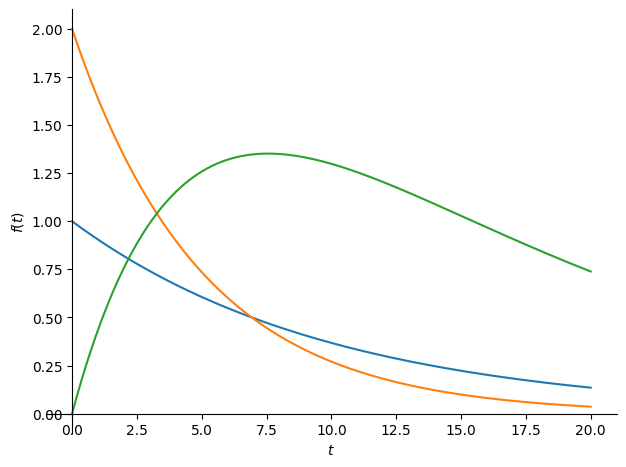

In [ ]:
pl1 = plot(dsol1[0].rhs, (t, 0, 20), show=false)
pl2 = plot(dsol1[1].rhs, (t, 0, 20), show=false)
pl3 = plot(dsol1[2].rhs, (t, 0, 20), show=false)
pl1.extend(pl2)
pl1.extend(pl3)
pl1.show()

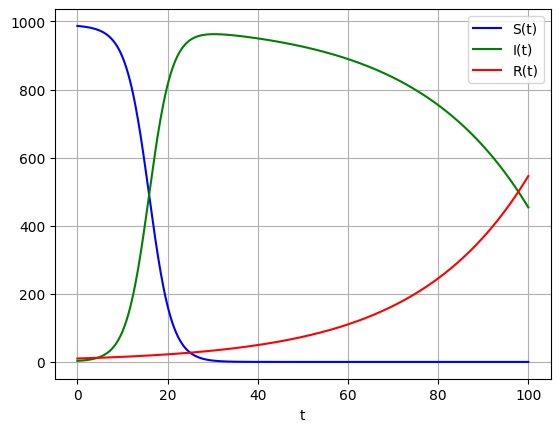

In [ ]:
import numpy as np

def pend(y, t):
    theta, omega, gamma = y
    dydt = [-0.0004*theta*omega, 0.0004*theta*omega - 0.04*gamma, 0.04*gamma]
    return dydt

y0 = [987, 3, 10]
t = np.linspace(0, 100, 500)

from scipy.integrate import odeint

sol = odeint(pend, y0, t)
import matplotlib.pyplot as plt

plt.plot(t, sol[:, 0], 'b', label='S(t)')
plt.plot(t, sol[:, 1], 'g', label='I(t)')
plt.plot(t, sol[:, 2], 'r', label='R(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

### Задание 1

Рассматривается случай, при котором в процессе опустошения бака с водой через отверстие в дне бака убывание воды соответствует экспоненциальному закону убывания. Вода из первого бака объемом $2$ литра вытекает из отверстия в дне во второй бак, в котором в начальный момент времени содержится $1$ литр воды. Объем воды в первом баке уменьшается по экспоненциальному закону с коэффициентом $k_{1}=0.2$. Вода из второго бака вытекает из отверстия в дне в третий бак. Объем воды во втором баке уменьшается по экспоненциальному закону с коэффициентом $k_{2}=0.1$. Составьте однородную систему дифференциальных уравнений и определите:
1.  время, когда объем воды в третьем баке станет больше $2.5$ литра;
2.  момент времени, когда второй бак заполнится максимально;
3.  максимальный объем, на который заполнится второй бак.

Время, когда объем воды в третьем баке станет больше 2.5 литров: 22.62 секунд
Момент времени, когда второй бак заполнится максимально: 4.70 секунд
Максимальный объем, на который заполнится второй бак: 1.56 литров


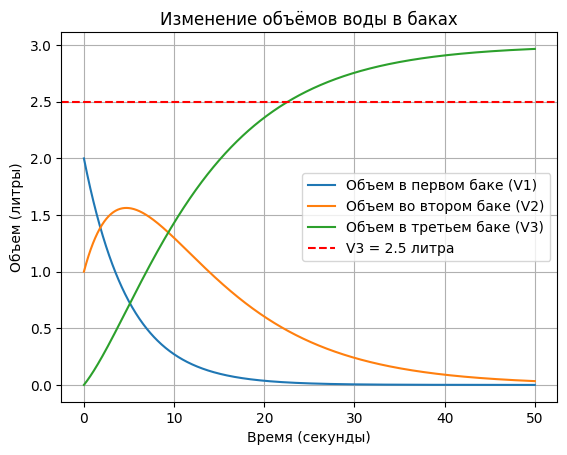

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k1 = 0.2
k2 = 0.1

V1_0 = 2.0
V2_0 = 1.0
V3_0 = 0.0

def model(y, t):
    V1, V2, V3 = y
    dV1dt = -k1 * V1
    dV2dt = 0.4 * np.exp(-k1 * t) - k2 * V2
    dV3dt = k2 * V2
    return [dV1dt, dV2dt, dV3dt]

t = np.linspace(0, 50, 1000)

initial_conditions = [V1_0, V2_0, V3_0]
solution = odeint(model, initial_conditions, t)

V1, V2, V3 = solution.T

time_when_V3_greater_than_2_5 = t[np.where(V3 > 2.5)][0]
print(f"Время, когда объем воды в третьем баке станет больше 2.5 литров: {time_when_V3_greater_than_2_5:.2f} секунд")

V2_derivative = np.gradient(V2, t)
max_time_for_V2 = t[np.argmax(V2_derivative < 0)]
print(f"Момент времени, когда второй бак заполнится максимально: {max_time_for_V2:.2f} секунд")

max_volume_V2 = np.max(V2)
print(f"Максимальный объем, на который заполнится второй бак: {max_volume_V2:.2f} литров")

plt.plot(t, V1, label='Объем в первом баке (V1)')
plt.plot(t, V2, label='Объем во втором баке (V2)')
plt.plot(t, V3, label='Объем в третьем баке (V3)')
plt.axhline(y=2.5, color='r', linestyle='--', label='V3 = 2.5 литра')
plt.xlabel('Время (секунды)')
plt.ylabel('Объем (литры)')
plt.title('Изменение объёмов воды в баках')
plt.legend()
plt.grid()
plt.show()